<h2>Evaluation metrics and diagnostics in ML</h2>

Evaluation metrics and diagnostics performed after model training are crucial part of ML workflow. They help answer:

    “How well is my model performing?”
    “Where and why is it making mistakes?”

<h3>📌 Part 1: Main Principles of Evaluation Metrics</h3>

🔹 <b>1. Choice Depends on the Task</b>

    Regression? → Use metrics like MSE, MAE, R², etc.

    Classification? → Use Accuracy, Precision, Recall, F1, ROC-AUC, etc.

    Imbalanced data? → Never rely on accuracy alone!

🔹 <b>2. Confusion Matrix is the Core (for classification)</b>

    Visual overview of TP/FP/TN/FN

🔹 <b>3. Trade-offs Matter</b>

    You can increase Recall by predicting more positives — but it may decrease Precision.

    You can increase Precision by being stricter — but it may decrease Recall.

🔹 <b>4. Diagnostics Should Be Visual</b>

    Use ROC curves, Precision-Recall curves, learning curves, residual plots, etc.

    Use cross-validation scores to avoid overfitting to train-test split.

🔹 <b>5. Use Multiple Metrics</b>

There’s no “one best metric.” Use:

    Accuracy for balanced classification.

    Precision/Recall for imbalanced or critical tasks.

    F1 score for balance between precision and recall.

    AUC-ROC for probabilistic or ranking models.

    MSE/R² for regression models.

    Log Loss for probabilistic confidence in classification.

## 🔹 Golden Rule:
Always evaluate on *unseen data* (test set or cross-validation fold).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104
ROC AUC Score: 0.9977071732721913

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



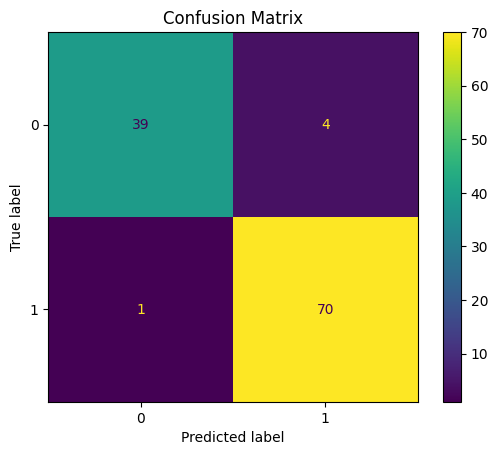

In [3]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

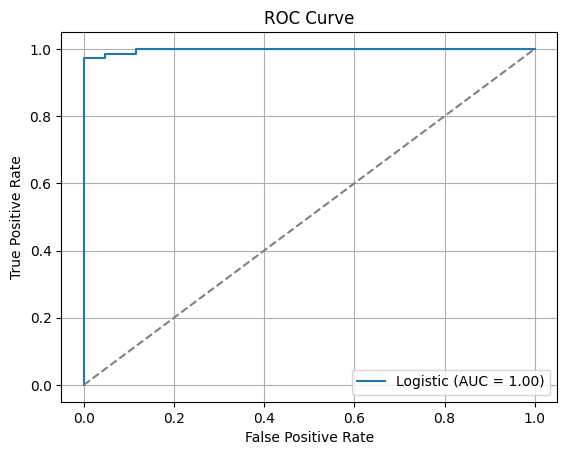

In [4]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="Logistic (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 🛠️ Next Steps After Evaluation Metrics and Diagnostics

    ✅ Cross-validate this result to check consistency. (Part of Model Selection)
    
        Purpose: Estimate generalisation performance, detect overfitting.

    🔍 Look for feature importance or SHAP plots to understand why it performs so well. (Part of Model Interpretation / Explainability)
    
        Purpose: Understand the logic and transparency of the model’s predictions.

    ⚠️ Check for data leakage or target leakage if this is not a controlled dataset. (Part of Data Diagnostics / Data Validation)

        Purpose: Ensure evaluation results are trustworthy and not inflated due to flawed data.

    📊 Try with imbalanced datasets to practice how metrics behave in harder scenarios. (Part of Data Preparation / Diagnostics and of Model Selection)

        Purpose: Learn how to use Recall, F1, AUC, etc., properly under class imbalance.

    🧪 Compare this model to: (Part of Model Selection)

        Random Forest

        SVM

        KNN

        Naive Bayes

        Gradient Boosting

        Purpose: Choose the best-performing algorithm or pipeline.